# LSTM to predict active price

## Load data

In [1]:
import pandas as pd
import ssl # we need to import this library and tweak one setting due to fact we use HTTPS certificate(s)
import yaml

In [2]:
cfg = open("../config.yaml")
config = yaml.load(cfg, Loader=yaml.FullLoader)

In [3]:
filepath = config["dataset_path"]
ssl._create_default_https_context = ssl._create_unverified_context

# Now we want to create a dataframe and use Pandas' to_csv function to read in our file
df = pd.read_csv(filepath, skiprows=1)  # we use skiprows parameter because first row contains our web address

In [4]:
# Now that we have loaded our data into the dataframe, we can preview it using the print & .head() function
df = df.sort_values(['date'], ascending=[True])
df.head(15)  # print first 15 lines of dataframe

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1547,1.502928e+09,2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,NaN
1546,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,NaN
1545,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,NaN
1544,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,NaN
1543,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06,NaN
1542,1.503360e+09,2017-08-22,BTC/USDT,4016.00,4104.82,3400.00,4040.00,939.91,3648726.50,NaN
1541,1.503446e+09,2017-08-23,BTC/USDT,4040.00,4265.80,4013.89,4114.01,980.50,4062506.52,NaN
1540,1.503533e+09,2017-08-24,BTC/USDT,4114.01,4371.68,4085.01,4316.01,770.46,3225405.80,NaN
1539,1.503619e+09,2017-08-25,BTC/USDT,4316.01,4453.91,4247.48,4280.68,563.36,2440323.79,NaN
1538,1.503706e+09,2017-08-26,BTC/USDT,4280.68,4367.00,4212.41,4337.44,225.76,967753.32,NaN


In [5]:
column_to_predict = config["column_to_predict"]
epochs = config["epochs"]
batch_size = config["batch_size"]
test_ratio = config["test_ratio"]

look_back = config["look_back"]
look_forward = config["look_forward_1"]

## Data preparation

In [6]:
import modules.data_prepare as prepare

In [7]:
dataset, scaler = prepare.extract_and_scale_data(df, column_to_predict)
X, y = prepare.split_and_reshape(dataset, scaler, look_back, look_forward, test_ratio)

X:(1527, 20),y:(1527, 1)


## Creating LSTM model

In [8]:
from modules.helpers import create_model
model = create_model(X.train, y.train, look_back, epochs, batch_size)

2021-11-10 13:48:20.328347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-10 13:48:20.328390: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-10 13:48:29.486304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-10 13:48:29.486345: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-10 13:48:29.486363: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bubunta): /proc/driver/nvidia/version does not exist
2021-11-10 13:48:29.486701: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/30
1496/1496 [==============================] - 3s 1ms/step - loss: 0.0022
Epoch 2/30
1496/1496 [==============================] - 2s 1ms/step - loss: 8.6350e-04
Epoch 3/30
1496/1496 [==============================] - 2s 1ms/step - loss: 6.8905e-04
Epoch 4/30
1496/1496 [==============================] - 2s 1ms/step - loss: 5.5912e-04
Epoch 5/30
1496/1496 [==============================] - 2s 1ms/step - loss: 5.6497e-04
Epoch 6/30
1496/1496 [==============================] - 2s 1ms/step - loss: 4.8394e-04
Epoch 7/30
1496/1496 [==============================] - 2s 1ms/step - loss: 4.6291e-04
Epoch 8/30
1496/1496 [==============================] - 2s 1ms/step - loss: 4.5365e-04
Epoch 9/30
1496/1496 [==============================] - 2s 1ms/step - loss: 4.6018e-04
Epoch 10/30
1496/1496 [==============================] - 2s 1ms/step - loss: 4.0158e-04
Epoch 11/30
1496/1496 [==============================] - 2s 1ms/step - loss: 4.2790e-04
Epoch 12/30
1496/1496 [======================

## Executing the model

In [9]:
from modules.helpers import predict_and_measure

### on train data

In [10]:
train_predict, train_rmse = predict_and_measure(model, X.train, y.train, scaler)
print('Train Score: %.2f RMSE' % (train_rmse))

Train Score: 1005.09 RMSE


### on test data

In [11]:
test_predict, test_rmse = predict_and_measure(model, X.test, y.test, scaler)
print('Test Score: %.2f RMSE' % (test_rmse))

Test Score: 2205.40 RMSE


## Plot the results

In [12]:
from modules.helpers import prepare_plot
import matplotlib.pyplot as plt

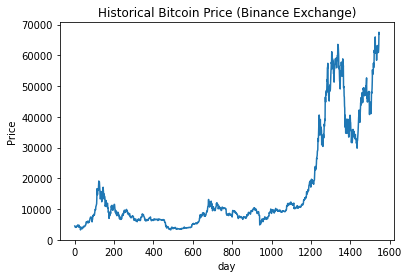

In [13]:
prepare_plot(
    title="Historical Bitcoin Price (Binance Exchange)",
    xlabel="day",
    ylabel="Price")
plt.plot(dataset)
plt.show()

In [14]:
import numpy as np

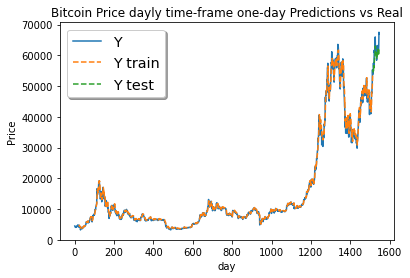

In [15]:
train_begin = look_back
train_end = train_begin + len(train_predict)

train_pred_plot = np.full_like(dataset, np.nan)
train_pred_plot[train_begin:train_end, :] = train_predict
# shift test predictions for plotting
test_pred_plot = np.full_like(dataset, np.nan)
test_pred_plot[train_end:-1, :] = test_predict

# plot baseline and predictions
_, ax = plt.subplots()
ax.plot(dataset, label='Y')
ax.plot(train_pred_plot, '--', label='Y train')
ax.plot(test_pred_plot, '--', label='Y test')
_ = ax.legend(loc='best', shadow=True, fontsize='x-large')

prepare_plot(
  title="Bitcoin Price daily time-frame one-day Predictions vs Real",
  xlabel="day",
  ylabel="Price"
)
plt.show()